# <center> Let's scrape books! 📚 </center>

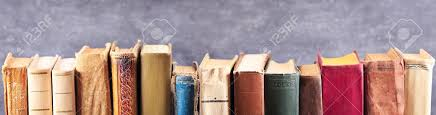

Here's a notebook to play with code in order to get useful info from a fictional bookstore webpage with BeautifulSoup Python library  🥘😉

#### Web Scraping
*Web scrapping* is extracting structured data from a web page. 

##### Structured data
*Structured data* means that the data in the web page has a standarized format to "mark up" the information about the web page to allow search engines display the content in an attractive manner.

#### BeautifulSoup and Requests Libraries

- *Beautiful Soup* is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

- *Requests* library is the de facto standard for making HTTP requests in Python.


#### How it works?

A scrape bot get info from a website the same way we do, ie, go onto a web page of a website, get the relevant data and move into the next web page. As we may know, each website has a different structure, so the bot should be specially designed for each website. There are two main things we have to take in to account for this:

- The structure of the web page.
- How to get that web page

To accomplish this we need to undertand that websites are created using `HTML` along with `CSS` and `JavaScript`. The elements of `HTML` are separated by `tags` that introduce content to the web page. So, we need to navigate or inspect the `HTML` file in order to find out between which `tags` the relevant data is and tell this to our bot scraper. In addition, we must indicate which `links` should be explored and where to find them within the `HTML` file.


With this, we can get started!


#### My Hobbie 💚 📖

As I’m so in love with books and reading, in this notebook I just play a little bit with some Python code to get data from a fictional webpage which sells books. Forget about copy and paste info from a web page, with *Web Scrapping* we can navigate and get so much more. 

We can gather the following information:

- Book title
- Availability
- Genre or category
- Description
- Image
- Price
- Rating


#### What do we need?

- Modern browser (Chrome, Firefox, Safari ... you know)
- Jupyter Notebook (documentation: https://jupyter.org/)
- Beautiful Soup library (documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#)
- Requests library (documentation: https://2.python-requests.org/en/master/)
- Pandas library (documentation: https://pandas.pydata.org/docs/#)
- Python code
- Our target webpage: http://books.toscrape.com
- Desire to learn and have fun 🏄🏻


## Working with the libraries to get a readable `HTML` file

Let's first import the libraries we need to play with: Pandas, Numpy, Requests and BeautifulSoup

In [446]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Now, let's get the content of the main web page using *Requests* and make it readable with *BeautifulSoup*

In [447]:
BASE_URL = "http://books.toscrape.com/"
response = requests.get(BASE_URL + "index.html")
html = response.content

scraped = BeautifulSoup(html, 'html.parser')
print(scraped.prettify()[:1000])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

**Remark**: *prettyfy( )* works making the `HTML` more readable. Despite we won't use it directly to explore the relevant data, It is pretty useful to get an idea of what a code looks like in `HTML`. We can notice the famous `tags` and the content on them (`[:1000]` only show a few of the code). 

## Navigate `HTML` file and find the elements to get the desire information

For example, let's first find book `URLs` on the main page. To do this, go onto the main web page and righ-click on the name of a book and click "inspect". With this, you'll see the `HTML` part of the web page corresponding to this element. 

The structure of the `HTML` code is just like a tree. There, you can identify hierarchies (grandfather, parents, children, siblings ...) that contain information that can be accessed, as long as you are clear about this structure. Look at the following figure that shows the `HTML` structure for the first book `URL`:

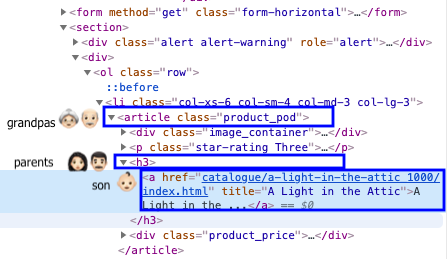

In our case, the **son** in the figure is the `URL` of the first book we want extract info about.

Remember that the content of the web page obtained at the begining (saved at the variable "scraped") will be the one we use to create the "soup" 🥘, that is, the tree of Python objects that represent the `HTML` document.

The `URL` of the book corresponds to the "href" attribute of the "a" tag. This one belongs to an "article" tag with the class value "product_pod". So, to get there, we can see the figure and try to chain the necesary tags using the method `find()` till we get to the **son** of this family tree.

Let's chain the tags starting with the **grandpas** ("< article >"), then with the **parents** ("< h3 >") and finally with the **son** ("< a >"). After all of this we have to use the method `get()` to obtain the book `URL` inside the `href` attribute.

In [448]:
scraped.find("article", class_="product_pod").h3.a.get('href')

'catalogue/a-light-in-the-attic_1000/index.html'

### Finding the URL of the books in one single page 🔗

Now that we have our first book `URL` (finding a single element), we can define a for loop to gather all the books `URLs` using the method `findAll()` and printing a list.

In [449]:
items1 = scraped.find_all("article", class_="product_pod")

for item in items1:
    book_url = item.h3.a["href"]
    print(book_url)

catalogue/a-light-in-the-attic_1000/index.html
catalogue/tipping-the-velvet_999/index.html
catalogue/soumission_998/index.html
catalogue/sharp-objects_997/index.html
catalogue/sapiens-a-brief-history-of-humankind_996/index.html
catalogue/the-requiem-red_995/index.html
catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
catalogue/the-black-maria_991/index.html
catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
catalogue/shakespeares-sonnets_989/index.html
catalogue/set-me-free_988/index.html
catalogue/scott-pilgrims-precious-little-life-scott-pilgrim-1_987/index.html
catalogue/rip-it-up-and-start-again_986/index.html
catalogue/our-band-could-be-your-life-scenes-from-the-american-indie-underground-1981-1991_985/index.html

### Finding the title of the books in one sigle page 📝
In the same tag `<a>` we can also see there is the attribute `title`, so we can access also the book title and print a list.

In [450]:
items2 = scraped.find_all("article", class_="product_pod")

for item in items2:
    title = item.h3.a["title"]
    print(title)

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


### Finding the price of the books in one sigle page 💵

We can now level up our searches and instead of using `find()` and `findAll()` methods we can use the **CSS Selectors** of `HTML` language. For example, the `select( )` selector allows us to access all the elements that meet a certain criteria, for example, `scraped.select("div")` get alls "divs". 

Now if we want to get all the elements with a certain class we use `.class` selector, for example, `scraped.select(.product_pod)` selects all the elements in the "product_pod" class. 

If we see the figure below, the price of a book is in the "price_color" class. So, we can chain the `select()` and the `.class` selectors to get faster our book prices.

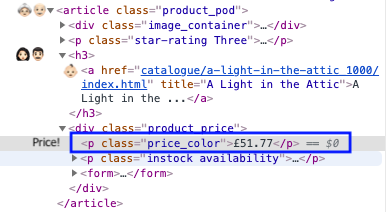

In [451]:
prices = scraped.select(".price_color")

for price in prices:
    print(price.text) # we use .text to get only the text inside of the class

£51.77
£53.74
£50.10
£47.82
£54.23
£22.65
£33.34
£17.93
£22.60
£52.15
£13.99
£20.66
£17.46
£52.29
£35.02
£57.25
£23.88
£37.59
£51.33
£45.17


Here we have a little (but common) problem, we have our list of prices as a string (we want them in numeric for further calculations) and also with the pound symbol "£". To solve this, check out what we have to do:

In [452]:
for price in prices:
    price = float(price.text.lstrip("£")) # float to convert the string into a number, 
                                          # lstrip extract the symbol "£" from the left side
    print(price)

51.77
53.74
50.1
47.82
54.23
22.65
33.34
17.93
22.6
52.15
13.99
20.66
17.46
52.29
35.02
57.25
23.88
37.59
51.33
45.17


Note: `#id` selector get all the elements with a certain id, for example, `scraped.select(#messages)` will get all the elements with the id "messages".

A useful idea is to mix selectors:

- `element element`
- `selector, selector`
- `.class.other_class`

## Scrape all books data

So far we have seen how to get some info from books in the **first page** of our webpage. Usually products are displayed in several pages where we can explore a few items in order to not be so excesive with the information we show. 
In our "book-to-scrape" webpage we can see (at the botton of the page) there are 50 pages showing items, also there is a button "next" to access those pages and a button "previous" to get back to the last product page.

In this figure we can see the `tags` and `attributes` of the "next" and "previous" buttons:
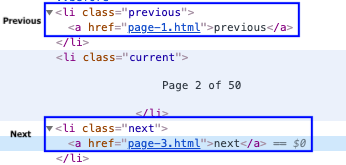

To get the info from all the pages we can go iteratively through all the "next" buttons. This task is a little bit hard to accomplish, because the pattern on the "next" button which allows to navigate through the pages is "page", but also the "previous" button contains this pattern.

Notice that if when iteratively navigating we obtain two results that match with "page" we must take the second one because it is the one that will correspond to the "next" page. On the other hand, for the first and last page we will only have one result because we will find either the "next" button or the "previous" button. You can see this in the figure above (it shows us page 1 and page 3 because we are currently located on page 2 of 50).

### Getting the URLs of all pages 🔗

First let's define a function to request and parse a `HTML` web page:

In [453]:
def get_and_parse_URL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

Now the idea is to fetch all the products (books) `URLs`, and for that we have to be able to get through all the pages using the previous explanation about the "next" and "previous" buttons on our web page. 


In [102]:
# We'll need a Python module for regular expressions
import re 

# Store all the results into a list, adding as a first element the URL of the main page
pages_urls = [BASE_URL + "index.html"]

# Request and parse the book-to-scrape page we are exploring
webpage_info = get_and_parse_URL(pages_urls[0])

# Remember: while we get 2 matches with the pattern "page", our webpage contains a "previous" and a "next" button.
# On the other hand, if we get 1 match there is only one button, that is to say, we are either on the first page 
# or on the last page. The condition stops when we get to the last page. 
# Explore the <a> tag and attribute 'href', the second finding only the reg exp "page"

while len(webpage_info.findAll("a", href = re.compile("page"))) == 2 or len(pages_urls) == 1:
    
# Building the complete url (https://books.toscrape.com/catalogue/page-number.html) by adding the fetched URL
# (page-number.html) to the BASE URL
# (http://books.toscrape.com/index.html) but removing the .html part of the BASE URL

    new_url = "/".join(pages_urls[-1].split("/")[:-1]) + "/" + webpage_info.findAll("a", href=re.compile("page"))[-1].get("href")
    
# Adding the URL to the list
    pages_urls.append(new_url)
    
# Parsing the next page
    webpage_info = get_and_parse_URL(new_url)
    

print("The site has " + str(len(pages_urls)) + " pages URLs")
print("A few URLs fetched:")
pages_urls[:5]


The site has 50 pages URLs
A few URLs fetched:


['http://books.toscrape.com/index.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html']

### Getting the URLs of all books 🔗📚

Now that we have all the `URLs` for the 50 pages on the webpage, we can proceed to extract the `URLs` of all the products (books) in each of those 50 pages. Let's build a function for that.

In [454]:
# This is an automation to get the URL of all books given the URL of a certain page
def get_books_URLs(url):
    webpage_info = get_and_parse_URL(url)
    return(["/".join(url.split("/")[:-1]) + "/" + x.div.a.get('href') for x in webpage_info.findAll("article", class_ = "product_pod")])

In [455]:
# This is an atomation to get the URL of all books given a list of URL's pages 

books_URLs = []

for page in pages_urls:
    books_URLs.extend(get_books_URLs(page))
    
print("The 50 pages have " + str(len(books_URLs)) + " books URLs")
print("Some books URLs:")
books_URLs[:5]

The 50 pages have 1000 books URLs
Some books URLs:


['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'http://books.toscrape.com/catalogue/soumission_998/index.html',
 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html']

### Getting the URLs of all categories 🔗 🗂

Another aspect that can be navigated in a iteratively way is the book's catalog of **categories**. The figure below shows the inspection of this section in the webpage, and we can see that categories follow the same `URL` pattern: "catalogue/category/books". Also, we can notice that this can be explored through the tags `<li>`, `<a>` and the attribute `href` on them.

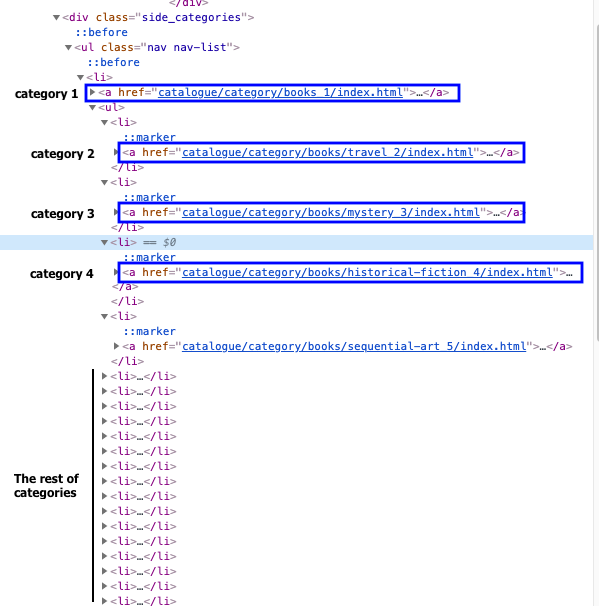

Using the `re` Python module for regular expressions and BeautifulSoup library, we can find the `URLs` that match this pattern in order to get the categories `URLs`. 

**Remark:** we have to be careful to remove the first category (see the figure above) because it corresponds to all the books in the webpage.

In [456]:
# Getting the categories according to the pattern
categories_urls = [BASE_URL + "index.html" + x.get('href') for x in scraped.find_all("a", href=re.compile("catalogue/category/books"))]
# Removing the first one
categories_urls = categories_urls[1:] 

print("The catalogue of books has " + str(len(categories_urls)) + " categories URLs")
print("Some few URLs categories:")
categories_urls[:5]

The catalogue of books has 50 categories URLs
Some few URLs categories:


['http://books.toscrape.com/index.htmlcatalogue/category/books/travel_2/index.html',
 'http://books.toscrape.com/index.htmlcatalogue/category/books/mystery_3/index.html',
 'http://books.toscrape.com/index.htmlcatalogue/category/books/historical-fiction_4/index.html',
 'http://books.toscrape.com/index.htmlcatalogue/category/books/sequential-art_5/index.html',
 'http://books.toscrape.com/index.htmlcatalogue/category/books/classics_6/index.html']

## Getting product (book) data 📤

The last thing to do in this book web scrapping is get the information of each product (book) on the website. To do this you can inspect any element (book) on the site and see how the information is structured. Let's explore one product page in the following figure

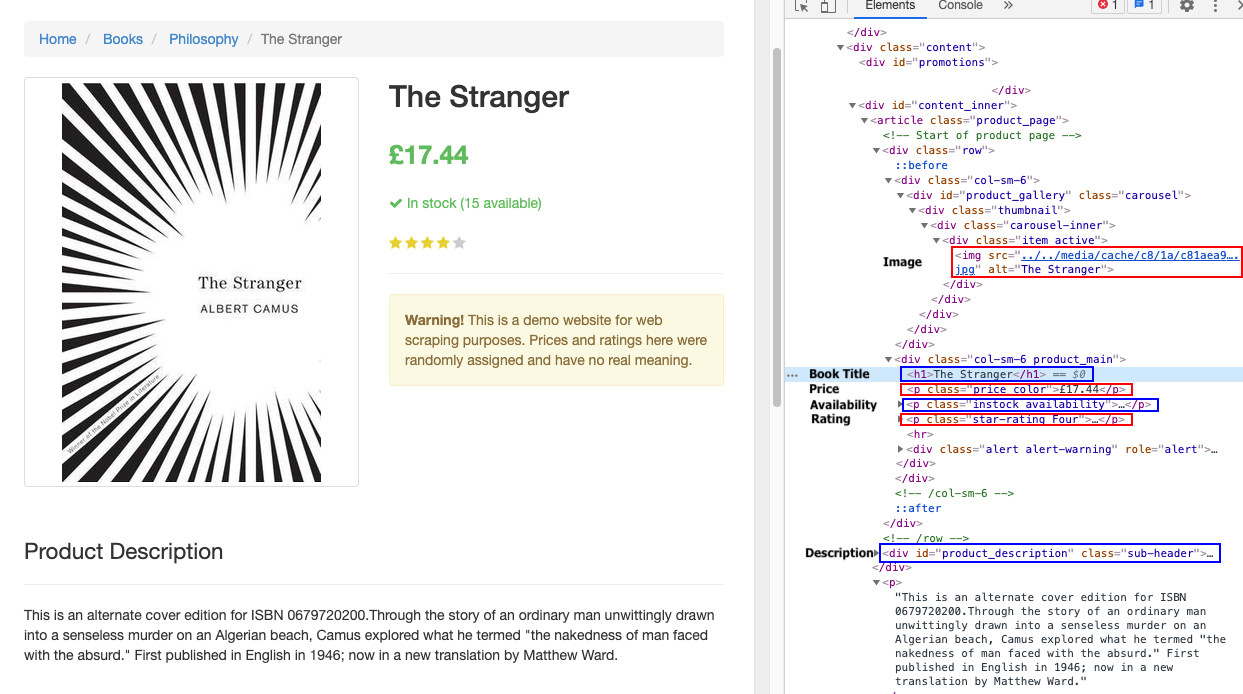

So, I can get from my favorite book "The stranger" a few things such as:

- Image 
- Book Title
- Price
- Availability
- Rating 
- Description
- Category

Let's give it a try!

**Alert:** the next code while take a while running

In [457]:
# Store all the things we want into a list (except for the book description that we'll check apart)

images_urls = []
books_titles = []
books_prices = []
books_availability = []
books_ratings = []
books_categories = []
# We'll use this to map the result (string) into numbers (x stars/5) of rating
pairs = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
# Get (scrape) data for every book URL 
for url in books_URLs:
    book_info = get_and_parse_URL(url)
    # URL of the book image
    images_urls.append(url.replace("index.html", "") + book_info.find("img").get("src"))
    
    # Book title
    books_titles.append(book_info.find("div", class_ = re.compile("product_main")).h1.text)
    
    # Price of the book (without pound symbol "£")
    books_prices.append(float(book_info.find("p", class_ = "price_color").text[2:]))
    
    # Number of books available (just the number without strings)
    books_availability.append(int(re.sub("[^0-9]", "", book_info.find("p", class_ = "instock availability").text)))
    
    # The rating of the book (number of stars: min 1/5 - max 5/5)
    books_ratings.extend([pairs[num] for num in [book_info.find("p", class_ = re.compile("star-rating")).get("class")[1]] if num in pairs])
    
    # Category of the book (just the name of category withour numbers and other symbols)
    books_categories.append(re.sub(r"[^a-z]", " ", book_info.find("a", href = re.compile("../category/books/")).get("href").split("/")[3]).strip().title())

Now let's make a DataFrame (or fancy table) with our data collected

In [458]:
# Using Pandas previously imported
scraped_books_data = pd.DataFrame({'Title': books_titles, 'Category': books_categories,'Price': books_prices, 'Stock': books_availability,'Rating': books_ratings, 'URL Images': images_urls})
scraped_books_data.head(n=20)

,Title,Category,Price,Stock,Rating,URL Images
0,A Light in the Attic,Poetry,51.77,22,3,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,Historical Fiction,53.74,20,1,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,Fiction,50.10,20,1,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,Mystery,47.82,20,4,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,History,54.23,20,5,http://books.toscrape.com/catalogue/sapiens-a-...
5,The Requiem Red,Young Adult,22.65,19,1,http://books.toscrape.com/catalogue/the-requie...
6,The Dirty Little Secrets of Getting Your Dream...,Business,33.34,19,4,http://books.toscrape.com/catalogue/the-dirty-...
7,The Coming Woman: A Novel Based on the Life of...,Default,17.93,19,3,http://books.toscrape.com/catalogue/the-coming...
8,The Boys in the Boat: Nine Americans and Their...,Default,22.60,19,4,http://books.toscrape.com/catalogue/the-boys-i...
9,The Black Maria,Poetry,52.15,19,1,http://books.toscrape.com/catalogue/the-black-...


### How to get books description 🗒

We can also access to the sinopsis or description of our favorite book. This can be a lot of text and that's why I keep this apart.

To do this we have to take into account the class `product_pod` and the tags `<article>`, `<h3>` and `<a>` to first get the titles of the books, and finally navigate in the `<div>` tag to get the description. 

In [459]:
# Store all books descriptions into a list

title_descriptions = []

articles = scraped.select(".product_pod")

for article in articles:
    title = article.h3.a["title"]
    title_url = article.h3.a["href"]
    
    product_response = requests.get(BASE_URL + title_url)
    product_html = product_response.content
    product_scraped = BeautifulSoup(product_html, 'html.parser')
    
    description = product_scraped.find("div", id="product_description").next_sibling.next_sibling
    
    title_descriptions.append({title: description.text.strip()})


`title_descriptions` is a list with dictionary elements on it, so, in order to get our favorite book description we have to go through the key (title of the book) like this:

In [460]:
for d in title_descriptions:
    print(d['A Light in the Attic'])
    

It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounded

KeyError: 'A Light in the Attic'

## Making some visualization of the data collected 📊

At this stage we have collected a lot of information about this webpage. Normally this information is cleaned and prepared exhaustively for analysis. I did a little bit of this cleaning in variables such as category, price and rating in order to present them in an appropriate form to make now some visualization. 

Remember we are working on a fake webpage of books, so we have limited info, and with this let's try to make some nice visualizations on the data.

Maybe a person who owned this startup would be interested in looking prices from low to high, average price of books per category, quantity of books per category or per rating, stock of books per category, average of rating per category and so on. 

Let's take a look in some graphics 📈

First of all we need to import some visualization (or graph) tools from Python: `matplotlib`, `seaborn` and `pandas` visualization (this one is already imported)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
scraped_books_data.head()

### Books per Category

Let's check how many books per Category there are in a nice coloured graph using the `seaborn` library. 

As they can be a lot to show in a graph, maybe should be better to check first how many different categories we have:

In [ ]:
print('There is ', scraped_books_data['Category'].nunique(), 'different categories')


In [ ]:
# Customize your seaborn graph with sheet style, this one makes your graphs clearer and beauty
plt.style.use('seaborn-darkgrid')


plt.figure(figsize=(15,10))

# To show a few 
#plt1 = sns.countplot(x = scraped_books_data['Category'], order = scraped_books_data['Category'].value_counts().iloc[:10].index, palette=sns.color_palette("rainbow",10))

# To show all
plt1 = sns.countplot(x = scraped_books_data['Category'], order = scraped_books_data['Category'].value_counts().index, palette=sns.color_palette("rainbow",10))

rot_lab1 = plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)


### Average Price vs Category

Let's calculate first the `mean` or average price and rating per category using the `groupby()` method, and use it to make our plot "Avg. Price vs Category".


In [ ]:
avg_pr = scraped_books_data.groupby('Category').mean().round()[['Price', 'Rating']]
avg_pr.reset_index(inplace=True)

avg_pr.head()

In [ ]:
plt.figure(figsize=(15,5))

scraped_books_data.groupby("Category").Price.mean().sort_values(ascending=False).plot.bar(color ='#e8ae3b')

tit2 = plt.title('Avg. Price per Categories')
labx2=plt.xlabel('$ Category $ ')
laby2=plt.ylabel('Avg. Price in £ ')

This simple bar graph show us the 50 categories of books and their mean price from high to low. We can observe that the more expensive category is **Suspense**, followed by **Novels** and **Politics**. Who could imagine that books on politics are in the top three most expensive (over 50 £)? 👀 this page is really a fake 🤪, and the cheaper ones (under 10 £) the crime category.

### Average Rating per Category

Using the same idea on the table `avg_pr` we can plot now an average of ratin per category, and see which category/ies is/are around the highest rating (4 and 5 stars) and which in the lowest (1 and 2 stars).

In [ ]:
plt.figure(figsize=(15,5))

scraped_books_data.groupby("Category").Rating.mean().sort_values(ascending=False).plot.bar(color ='#b84823')

tit3 = plt.title('Avg. Rating per Category')
labx3=plt.xlabel('$ Category $ ')
laby3=plt.ylabel('Avg. Rating from 1 to 5 stars ')

Between 1 and 2 stars are really few categories such as Parenting, Academic, Psicology, Short Sories, Cultural, Paranormal and Crime. Meanwhile, the most high rated categories are Erotica, Fiction and Novels. 

**Remark:** remember that this is a fake webpage of books and also this data hasn't been cleaned. 

### Average Price vs Rating

Here we can use a bar plot to show per rating (from 1 star to 5 stars) how much does it cost (in average) a book on each rating star. The graph show that every rated book with 1,2 or 3 stars (in average) has the same value, meanwhile for books rated with 4 and 5 stars the price is a little bit higher. 

In [ ]:
plt4=scraped_books_data.groupby("Rating").Price.mean().sort_values(ascending=False).plot.bar(color ='#2c97a5')
rot_lab4 = plt4.set_xticklabels(plt4.get_xticklabels(), rotation=0)


### Number of Books per Rating

Let's check now the number of titles per ratings (1 to 5 stars). In the table we can see that there is a lot of books rated  by 1 star (226), meanwhile the less amount of books (179) are rated by 4 stars.

In [ ]:
tit_rat = scraped_books_data.groupby('Rating').count().sort_values(by = 'Title',ascending=False)[['Title']]
tit_rat.reset_index(inplace=True)

tit_rat

In [ ]:
df = pd.DataFrame({'Rating': {'1 star': 226, '2 stars': 196, '3 stars': 203, '4 stars': 179, '5 stars': 196}})

plt5 = df.T.plot(kind='bar', color=['C5', 'C6', 'C7', 'C8', 'C9'])

rot_lab5 = plt5.set_xticklabels(plt5.get_xticklabels(), rotation=0)

laby5=plt.ylabel('Number of Books')


<b> Author </b>

Adelis Nieves is a Mathematician and MSc. in Computer Science, with interests in Data Science and Data Analysis. She has several years of experience teaching applied maths at a High Level and also applying her strong background in math in learning and building new techniques for exploring data and sharing this information with the interested community. 